In [1]:
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [2]:
import xarray as xr
import numpy as np
import pandas as pd

from mytools import remove_trends

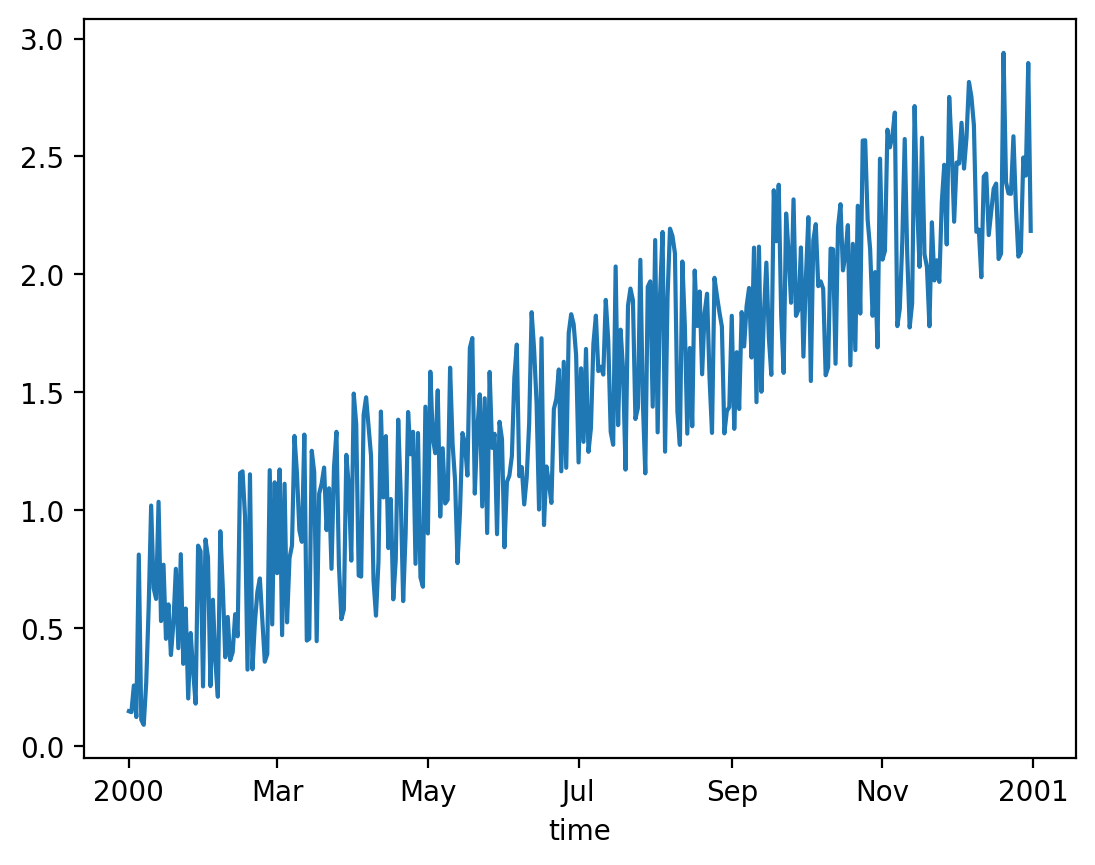

In [3]:
time_axis = pd.date_range("2000-01-01", "2000-12-31", freq="D")
time = np.arange(0, len(time_axis))

data = np.random.rand(len(time)) + np.linspace(0, 2, len(time))

da = xr.DataArray(data, dims=["time"], coords={"time": time_axis})

da.plot()

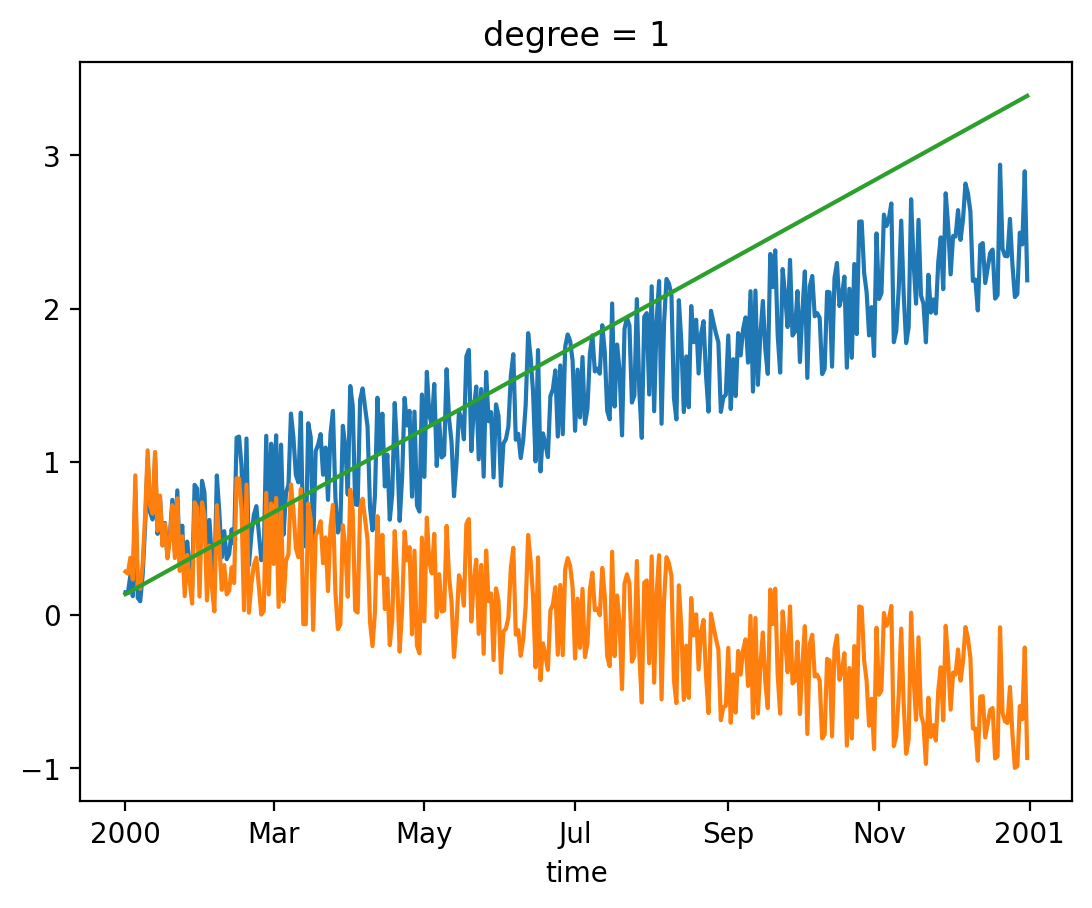

In [4]:
t0 = "2000-06-01"
t1 = "2000-08-01"

da_notrend, trend = remove_trends(
    da=da, start=t0, end=t1, time_dim="time", method="linear"
)
da.plot()
da_notrend.plot()
trend.plot()

In [5]:
da_notrend.sel(time=slice(t0, t1)).mean("time").values, da_notrend.mean("time").values

(array(-2.50695522e-17), array(-0.02430445))

In [6]:
trend.diff("time").sum().values

array(3.25318728)